In [155]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings as wr
wr.filterwarnings('ignore')

In [156]:
df = pd.read_csv('mall customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [157]:
df.shape

(200, 5)

In [158]:
df.drop(['CustomerID','Gender'], axis=1, inplace=True)

In [159]:
df.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


In [160]:
df.rename(columns={'Age': 'age', 'Annual Income (k$)':'income', 'Spending Score (1-100)':'score'}, inplace=True)

In [161]:
df.head()

,age,income,score
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


In [162]:
df.shape

(200, 3)

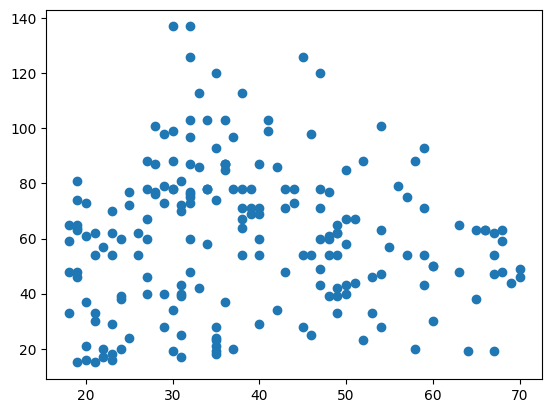

In [163]:
plt.scatter(df.age, df.income)
plt.show()

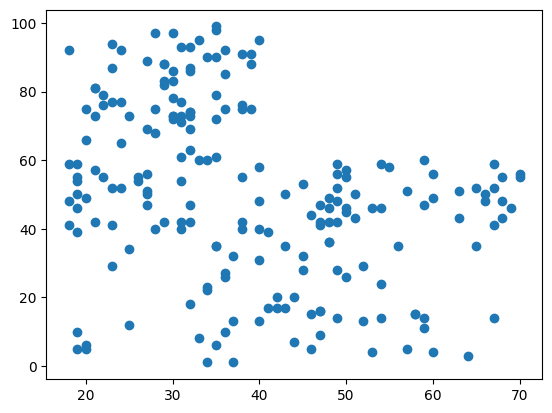

In [164]:
plt.scatter(df.age, df.score)
plt.show()

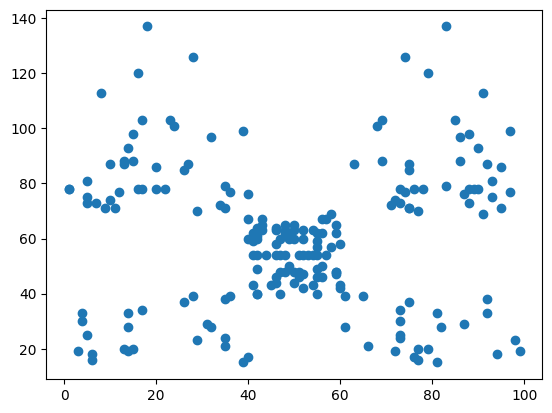

In [165]:
plt.scatter(df.score, df.income)
plt.show()

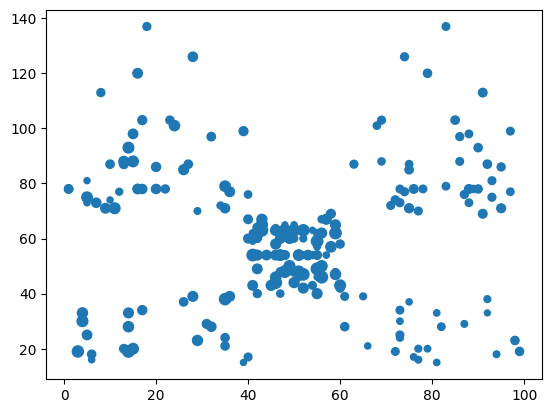

In [166]:
plt.scatter(df.score, df.income, df.age)
plt.show()

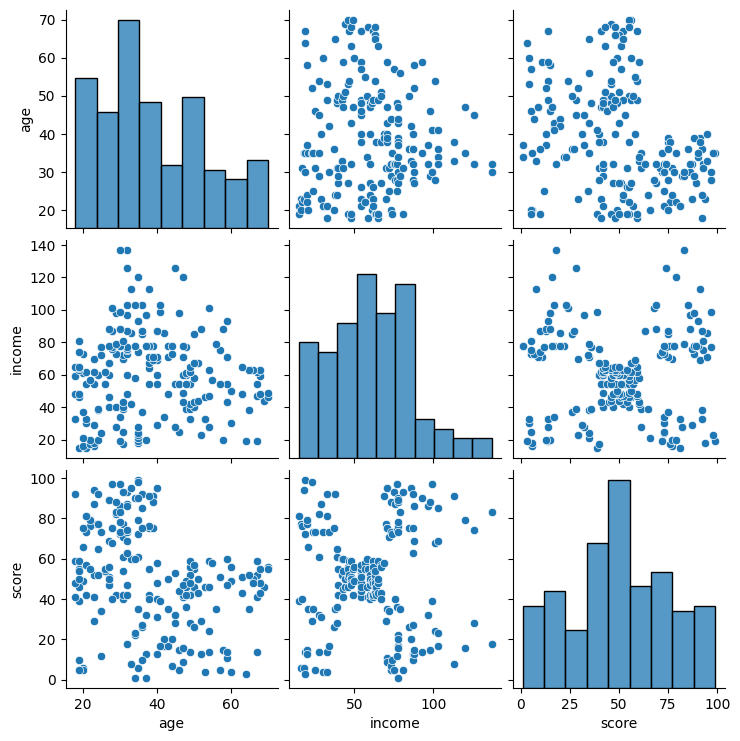

In [167]:
sns.pairplot(df[['age','income','score']])
plt.savefig('image.png')

# KMEANS CLUSTER

[KMeans Cluster](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html)

[Download this Cheatsheet](https://github.com/rashakil-ds/Top-Data-Science-AI-Book-Collection/blob/main/Other%20Docs/Clustering%20Algorithms.pdf)

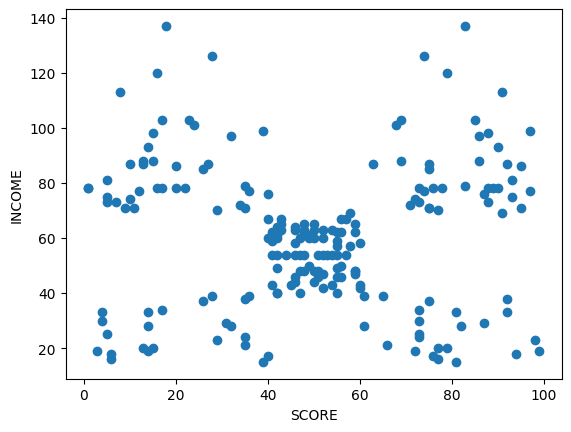

In [168]:
plt.scatter(df.score, df.income)
plt.xlabel('SCORE')
plt.ylabel('INCOME')
plt.show()

In [169]:
from sklearn.cluster import KMeans

In [170]:
km = KMeans() #default n_clusters=8

In [171]:
df['clust'] = km.fit_predict(df[['income', 'score']])

In [172]:
df

,age,income,score,clust
0,19,15,39,3
1,21,15,81,2
2,20,16,6,3
3,23,16,77,2
4,31,17,40,3
...,...,...,...,...
195,35,120,79,6
196,45,126,28,7
197,32,126,74,6
198,32,137,18,7


In [173]:
km.cluster_centers_

array([[ 78.03571429,  81.89285714],
       [ 63.95238095,  46.21428571],
       [ 25.0952381 ,  80.04761905],
       [ 25.72727273,  20.22727273],
       [ 80.18181818,  12.68181818],
       [ 47.65909091,  51.61363636],
       [108.18181818,  82.72727273],
       [109.7       ,  22.        ]])

In [174]:
df0 = df[df.clust==0]

In [175]:
df0.shape

(28, 4)

In [176]:
df0.head()

,age,income,score,clust
123,39,69,91,0
125,31,70,77,0
127,40,71,95,0
129,38,71,75,0
131,39,71,75,0


In [177]:
%matplotlib inline


#Magic Command: %matplotlib inline is a "magic command" specific to IPython and Jupyter environments.
#These commands provide special functionalities beyond standard Python syntax.

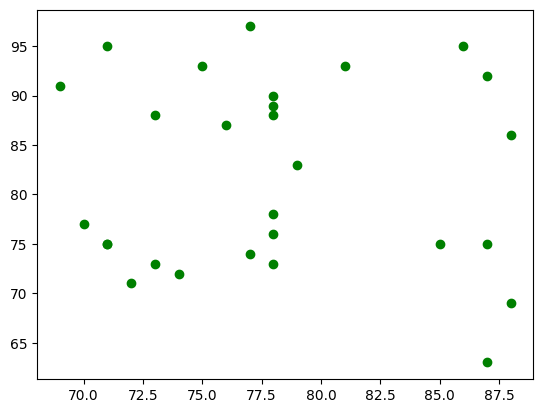

In [178]:
plt.scatter(df0.income, df0.score, color='green', label='cluster 0')

In [179]:
df1 = df[df.clust==1]
df2 = df[df.clust==2]
df3 = df[df.clust==3]
df4 = df[df.clust==4]
df5 = df[df.clust==5]
df6 = df[df.clust==6]
df7 = df[df.clust==7]

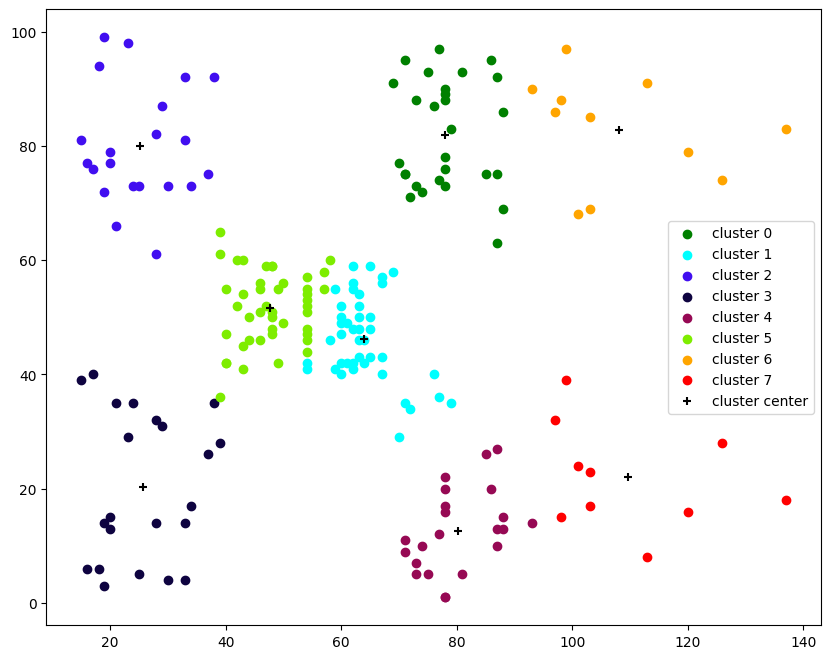

In [180]:
plt.figure(figsize=(10,8))

plt.scatter(df0.income, df0.score, color='green', label='cluster 0')
plt.scatter(df1.income, df1.score, color='cyan', label='cluster 1')
plt.scatter(df2.income, df2.score, color='#410EF0', label='cluster 2')
plt.scatter(df3.income, df3.score, color='#0E0340', label='cluster 3')
plt.scatter(df4.income, df4.score, color='#960954', label='cluster 4')
plt.scatter(df5.income, df5.score, color='#7EED00', label='cluster 5')
plt.scatter(df6.income, df6.score, color='orange', label='cluster 6')
plt.scatter(df7.income, df7.score, color='red', label='cluster 7')

plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], marker = '+', label='cluster center', color='black')

plt.legend()

# WCSS

In [181]:
wcss = []

for k in range(1, 15):
    km2 = KMeans(n_clusters=k)
    km2.fit(df[['income', 'score']])
    wcss.append(km2.inertia_)

In [182]:
wcss

[269981.28000000014,
 183499.07470288622,
 106348.37306211119,
 73679.78903948837,
 44454.47647967972,
 37455.98455516028,
 32239.485396706426,
 26127.94644929538,
 22119.993121413463,
 20244.62303426544,
 18398.632014570798,
 16869.579587348137,
 16256.109897538092,
 14064.065420559835]

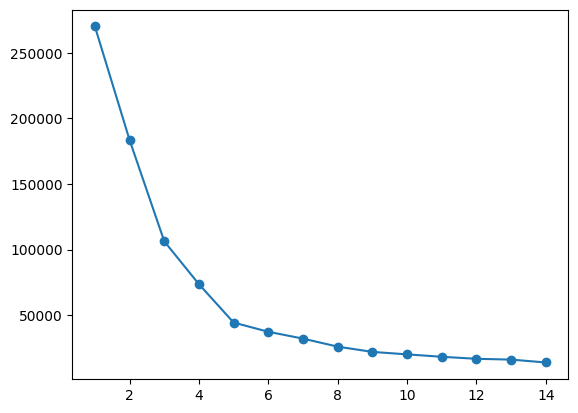

In [183]:
plt.plot(range(1,15), wcss, marker='o')

In [184]:
!pip install kneed

In [185]:
!pip show kneed

Name: kneed
Version: 0.8.5
Summary: Knee-point detection in Python
Home-page: https://github.com/arvkevi/kneed
Author: 
Author-email: Kevin Arvai <arvkevi@gmail.com>
License: 
Location: /usr/local/lib/python3.12/dist-packages
Requires: numpy, scipy
Required-by: 


In [186]:
from kneed import KneeLocator

In [187]:
kne = KneeLocator(range(1,15), wcss, curve='convex', direction = 'decreasing',)

In [188]:
kne

In [189]:
kne.knee

np.int64(5)

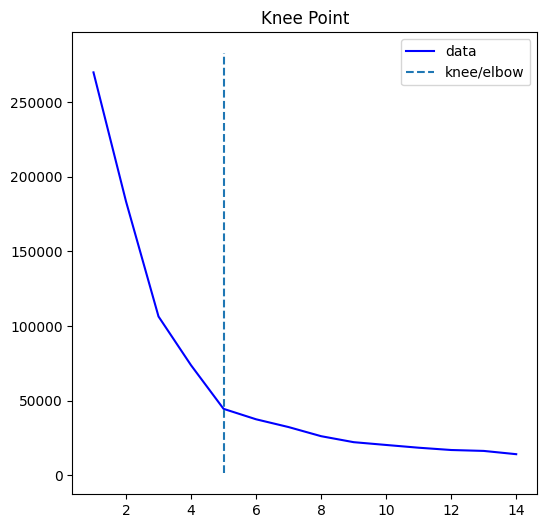

In [190]:
kne.plot_knee()

# Optimal

In [191]:
km = KMeans(n_clusters=5)
df['clust'] = km.fit_predict(df[['income', 'score']])

In [192]:
df.head()

,age,income,score,clust
0,19,15,39,4
1,21,15,81,2
2,20,16,6,4
3,23,16,77,2
4,31,17,40,4


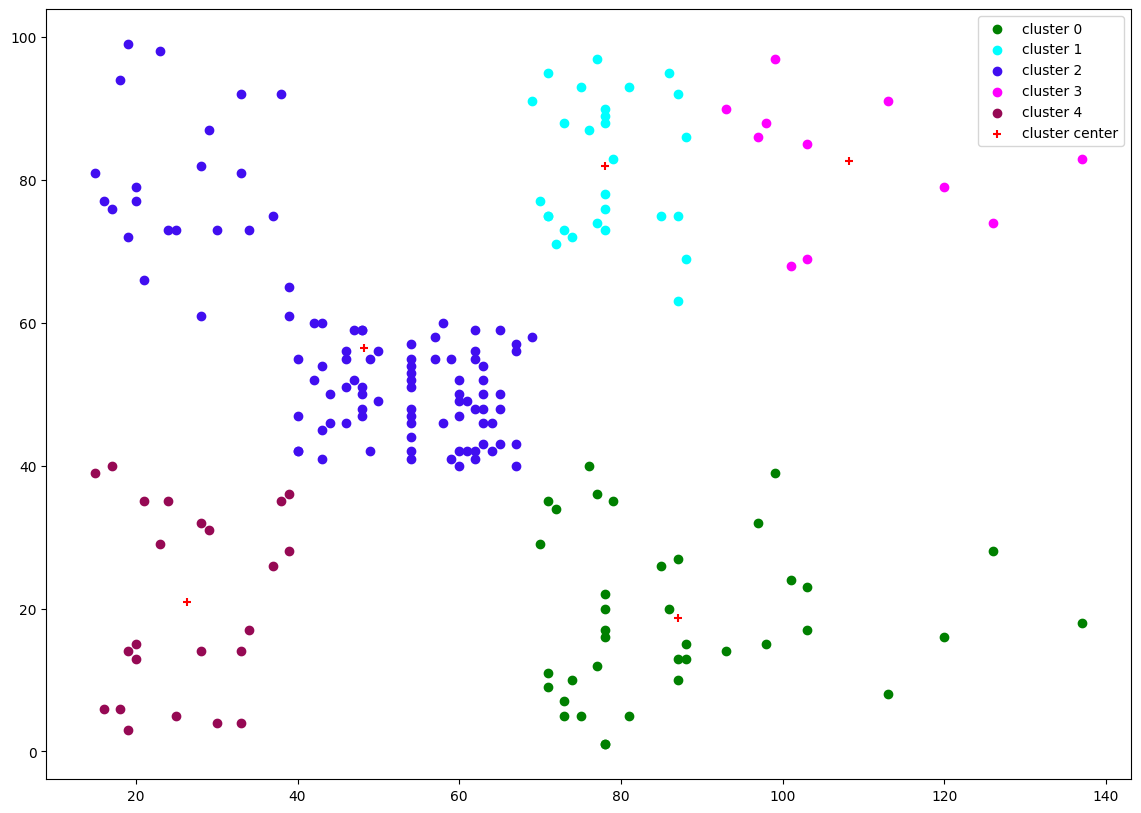

In [193]:
df0 = df[df.clust==0]
df1 = df[df.clust==1]
df2 = df[df.clust==2]
df3 = df[df.clust==3]
df4 = df[df.clust==4]


plt.figure(figsize=(14,10))

plt.scatter(df0.income, df0.score, color='green', label='cluster 0')
plt.scatter(df1.income, df1.score, color='cyan', label='cluster 1')
plt.scatter(df2.income, df2.score, color='#410EF0', label='cluster 2')
plt.scatter(df3.income, df3.score, color='magenta', label='cluster 3')
plt.scatter(df4.income, df4.score, color='#960954', label='cluster 4')


plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], marker = '+', label='cluster center', color='red')

plt.legend()

In [194]:
km.predict([[10,50]])

array([4], dtype=int32)

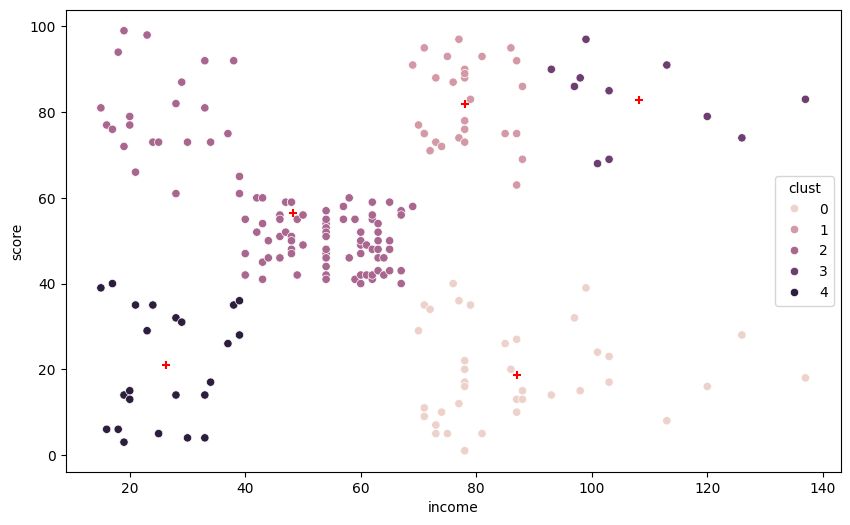

In [195]:
plt.figure(figsize=(10,6))

sns.scatterplot(data=df, x='income', y='score', hue='clust')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], marker = '+', label='cluster center', color='red')
